# 使用 kandinsky 实现文生图

不知何故，kandinsky 模型必须联网才能使用。

即使有了缓存，也要联网。

In [1]:
import sys,os,os.path

os.environ['http_proxy']="http://192.168.0.133:7890"
os.environ['https_proxy']="http://192.168.0.133:7890"
os.environ['all_proxy']="http://192.168.0.133:7890"

加载模型：

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16
).to("cuda")

pipeline.enable_model_cpu_offload()
pipeline.enable_xformers_memory_efficient_attention()


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/100 [00:00<?, ?it/s]

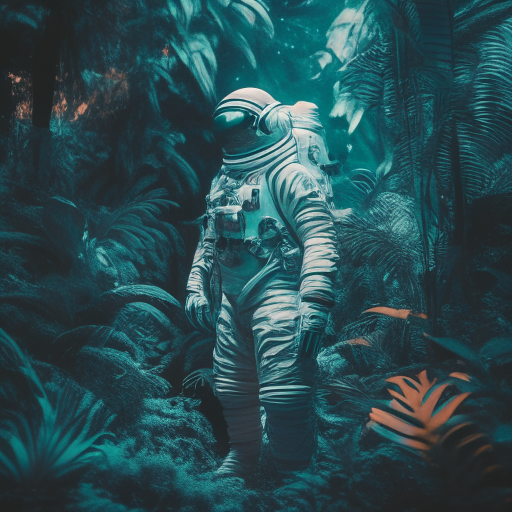

In [3]:
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

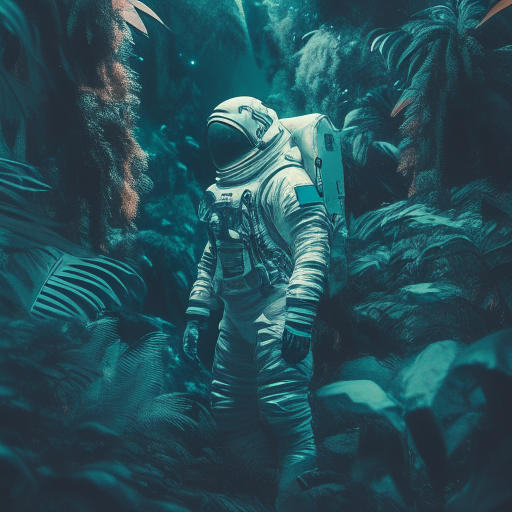

In [4]:
generator = torch.Generator("cuda").manual_seed(33333)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image